In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузим готовый датасет Fisher's Iris из библиотеки Sklearn

In [2]:
from sklearn.datasets import load_iris

# Из модуля sklearn.datasets загрузим готовый датасет load_iris() с данными об ирисах
iris = load_iris()

# Переменная iris представляет собой тип данных klearn.utils.Bunch, где значения для матрицы с данными (data), 
# вектора с классами-таргетами (target), а также названия переменных (features) можно извлечь, обращаясь
# к соответствующим ключам (keys):
data = iris.data
target = iris.target
features = iris.feature_names

In [3]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Визуализация данных

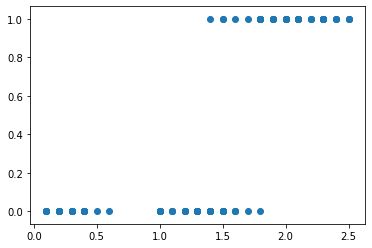

In [4]:
# Для логистической регрессии возьмем только параметр petal width (cm). Это четвертый столбец в наших данных.
x = data[:,3:]


# В наборе Ирисы Фишера у нас имеется 3 типа цветков ириса - Setosa, Versicolor, Virginica
# Соответственно, в векторе классов target у нас будут хранится три типа значений - 0, 1, 2  -  классы для каждого типа цветов
# Virginica - тип с самым большим цветком. Мы будем учить логистическую регрессию отделять этот тип цветка от двух других
# Поэтому нам нужно превратить значения класса Virginica 2 в 1, а все другие значения превратить в 0.
y = (target == 2).astype(np.int)

# Создадим рассеяную диаграмму
plt.scatter(x, y)
plt.show()

# Логистическая регрессия, используя библиотеку Sklearn

In [5]:
# Из модуля scikit-learn.linear_model импортиртируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression

# Создаем объект модели логистической регресии
log_regr = LogisticRegression()

# Тренируем модель на входных данных при помощи метода fit()
log_regr.fit(x, y)

# Получаем коэффициенты регресии с помощью аттрибутов coef_ и intercept_
intercept = log_regr.intercept_
slope = log_regr.coef_
print("Intercept: ", intercept )
print("Slope: ", slope)

Intercept:  [-7.1947083]
Slope:  [[4.3330846]]


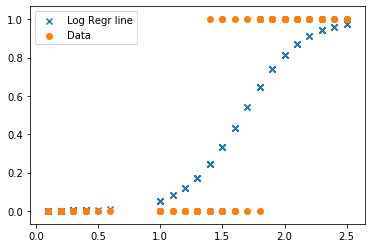

In [6]:
# Нарисуем сигмоиду логистической регрессии
# Для этого подставим значения коэф. регрессии в уравнение y = 1/(1+e^-(b0 + b1*x))

sigmoid = 1/(1 + np.exp(-(intercept+slope*x)))
sigmoid = sigmoid.reshape(-1,1)

plt.scatter(x, sigmoid, marker='x', label='Log Regr line')
plt.scatter(x, y, label='Data')
plt.legend()
plt.show()

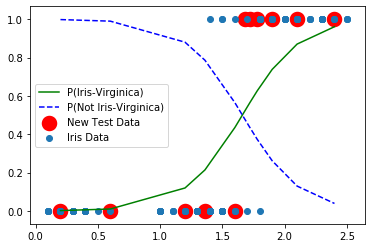

In [7]:
# Придумаем несколько новых точек
x_new = np.array([0.2, 0.6, 1.2, 1.36, 1.6, 1.68, 1.72, 1.78, 1.9, 2.1, 2.4]).reshape(-1,1)

# Получим предсказание к какому типу (1 - Virginica, 0 - Not Virginica) относится цветок  метода predict()
y_pred = log_regr.predict(x_new)

# В отличие от метода predict, который предсказывает класс для новых точек и чья размерность (N, 1),
# метод predict_proba предсказывает вероятность принадлежности экземпляра к тому или иному классу. 
# Размерность такого вектора будет (N,2), где N -  количество точек, используемых для проверки
y_proba = log_regr.predict_proba(x_new)


# Построим график
plt.scatter(x_new, y_pred, color='red', linewidth=9.5, label='New Test Data')
plt.scatter(x, y, label='Iris Data')
plt.plot(x_new, y_proba[:, 1], "g-", label="P(Iris-Virginica)") 
plt.plot(x_new, y_proba[:, 0], "b--", label="P(Not Iris-Virginica)")
plt.legend()
plt.show()